# 2. Modeling

### 2.0 Load Train, Val, Test (Numpy Array)

- Gray Scale : Data_gray 폴더 안에 .npy 파일이 있으면 된다.
- RGB Scale : Data 폴더 안에 .npy 파일이 있으면 된다.

#### Scale 설정
- scale = 'gray'
- scale = 'rgb'

In [16]:
scale = 'rgb'

if scale == 'gray':
    data_dir = 'Data_gray'
    channel = 1
    
elif scale == 'rgb':
    data_dir = 'Data'
    channel = 3

In [3]:
!ls {data_dir}

X_test.npy  X_train.npy  X_val.npy  y_test.npy	y_train.npy  y_val.npy


#### Load Data

In [6]:
import os
import numpy as np

if os.path.exists(data_dir):
    X_train = np.load(data_dir + '/X_train.npy')
    y_train = np.load(data_dir + '/y_train.npy')
    X_val = np.load(data_dir + '/X_val.npy')
    y_val = np.load(data_dir + '/y_val.npy')
    X_test = np.load(data_dir + '/X_test.npy')
    y_test = np.load(data_dir + '/y_test.npy')

    print(X_train.shape, y_train.shape)
    print(X_val.shape, y_val.shape)
    print(X_test.shape, y_test.shape)

(330, 64, 128, 128, 3) (330, 8)
(110, 64, 128, 128, 3) (110, 8)
(110, 64, 128, 128, 3) (110, 8)


### 2.1 C3D

#### 모델 이름 설정

In [7]:
model_name = 'c3d'

#### Parameters

In [8]:
epochs = 10
batch_size = 2

### 2.1.1 Model Define

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv3D(32, (3, 3, 3), activation = 'relu', input_shape = (64, 128, 128, channel)))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(64, (3, 3, 3), activation = 'relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(128, (3, 3, 3), activation = 'relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 62, 126, 126, 32)  2624      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 31, 63, 63, 32)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 29, 61, 61, 64)    55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 14, 30, 30, 64)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 12, 28, 28, 128)   221312    
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 6, 14, 14, 128)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)           

### 2.1.2 Model Compile

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### 2.1.3 Model Fit

In [15]:
%%time

History = model.fit(X_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (X_val, y_val))

Epoch 1/10
165/165 [==============================] - 48s 263ms/step - loss: 657.6991 - accuracy: 0.1857 - val_loss: 2.0366 - val_accuracy: 0.2545
Epoch 2/10
165/165 [==============================] - 42s 255ms/step - loss: 2.0133 - accuracy: 0.3278 - val_loss: 2.0298 - val_accuracy: 0.2636
Epoch 3/10
165/165 [==============================] - 42s 256ms/step - loss: 2.2381 - accuracy: 0.2958 - val_loss: 1.9841 - val_accuracy: 0.2636
Epoch 4/10
165/165 [==============================] - 42s 255ms/step - loss: 1.8864 - accuracy: 0.3652 - val_loss: 2.0171 - val_accuracy: 0.2636
Epoch 5/10
165/165 [==============================] - 42s 256ms/step - loss: 1.8633 - accuracy: 0.3920 - val_loss: 2.0454 - val_accuracy: 0.2545
Epoch 6/10
165/165 [==============================] - 42s 255ms/step - loss: 2.0064 - accuracy: 0.3586 - val_loss: 2.0672 - val_accuracy: 0.2545
Epoch 7/10
165/165 [==============================] - 42s 255ms/step - loss: 2.0992 - accuracy: 0.3207 - val_loss: 2.1278 - val_

### 2.1.4 Fitted Model Visualization

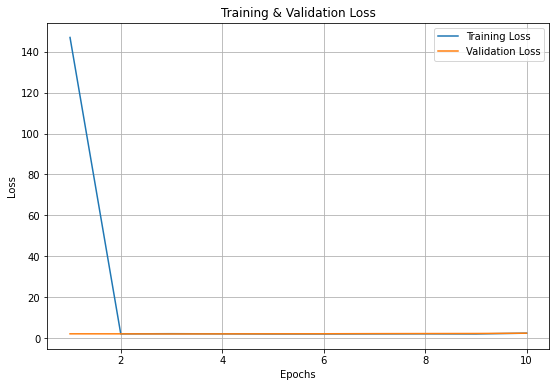

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(History.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History.history['loss'])
plt.plot(epochs, History.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

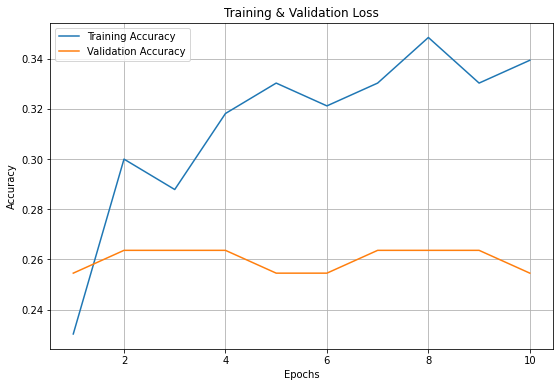

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(History.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History.history['accuracy'])
plt.plot(epochs, History.history['val_accuracy'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

### 2.1.5 Model Evaluate

In [19]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

55/55 [==============================] - 4s 74ms/step - loss: 2.4962 - accuracy: 0.2909
Loss = 2.49617
Accuracy = 0.29091


### 2.1.6 Model Save

In [20]:
save_dir = 'Models'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

final_model_name = '/' + scale + '_' + model_name + '.h5'

model.save(save_dir + final_model_name)

### 2.1.7 Saved Model Test

In [21]:
from keras.models import load_model

gray_c3d = load_model(save_dir + final_model_name)

loss, accuracy = gray_c3d.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

55/55 [==============================] - 4s 74ms/step - loss: 2.4962 - accuracy: 0.2909
Loss = 2.49617
Accuracy = 0.29091
